<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [164]:
import itertools
import pydotplus
import numpy as np
import scipy.optimize as opt

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import matplotlib as mpl
mpl.style.use("ggplot")
import seaborn as sns

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, jaccard_similarity_score, log_loss
from mlxtend.plotting import plot_decision_regions

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-07-08 02:52:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-07-08 02:52:04 (13.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [5]:
df = pd.read_csv('loan_train.csv')
print("Shape: ", df.shape)
print("Data types: ", df.dtypes)
df.head()

Shape:  (346, 10)
Data types:  Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [10]:
df['loan_status'].unique() # 有2种状态，分别是PAIDOFF和COLLECTION

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [13]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icu-58.2                   |       h211956c_0        22.5 MB  anaconda
    statsmodels-0.10.0         |   py37hdd07704_0         9.5 MB  anaconda
    scipy-1.2.1                |   py37h7c811a0_0        17.7 MB  anaconda
    libuuid-1.0.3              |       h1bed415_2          16 KB  anaconda
    fontconfig-2.13.0          |       h9420a91_0         291 KB  anaconda
    patsy-0.5.1                |           py37_0         375 KB  anaconda
    ca-certificates-2019.5.15  |                0         133 KB  anaconda
    pcre-8.43                  |       he6710b0_0         260 KB  anaconda
    dbus-1.13.6                |       h746ee38_0         587 KB  anaconda
    glib-2.56.2                |       hd4

icu-58.2             | 22.5 MB   | ##################################### | 100% 
statsmodels-0.10.0   | 9.5 MB    | ##################################### | 100% 
scipy-1.2.1          | 17.7 MB   | ##################################### | 100% 
libuuid-1.0.3        | 16 KB     | ##################################### | 100% 
fontconfig-2.13.0    | 291 KB    | ##################################### | 100% 
patsy-0.5.1          | 375 KB    | ##################################### | 100% 
ca-certificates-2019 | 133 KB    | ##################################### | 100% 
pcre-8.43            | 260 KB    | ##################################### | 100% 
dbus-1.13.6          | 587 KB    | ##################################### | 100% 
glib-2.56.2          | 5.0 MB    | ##################################### | 100% 
pip-19.1.1           | 1.8 MB    | ##################################### | 100% 
xz-5.2.4             | 366 KB    | ##################################### | 100% 
mkl_fft-1.0.10       | 169 K

Upload successful.


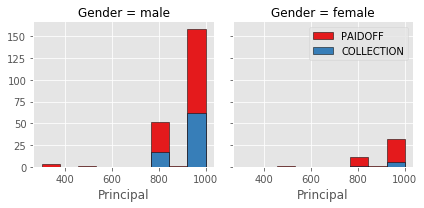

In [20]:
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)

g = sns.FacetGrid(df, col='Gender', hue = 'loan_status', palette = 'Set1', col_wrap=2)
g.map(plt.hist, 'Principal', bins = bins, ec = 'k')

g.axes[-1].legend()
plt.show()

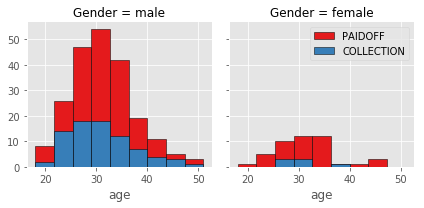

In [21]:
bins = np.linspace(df['age'].min(), df['age'].max(), 10)

g = sns.FacetGrid(df, col='Gender', hue = 'loan_status', palette = 'Set1', col_wrap=2)
g.map(plt.hist, 'age', bins = bins, ec = 'k')

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

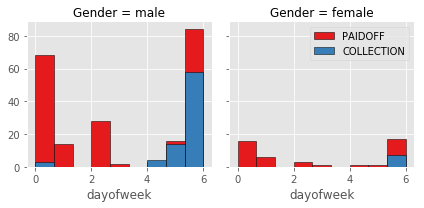

In [30]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'dayofweek', bins = bins, ec='k')
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less than day 4 

In [31]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [34]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan


Lets convert male to 0 and female to 1:


In [38]:
df['Gender'].replace(to_replace=['male','female'], value = [0,1], inplace = True)
df['Gender'].value_counts() 
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [43]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [41]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [45]:
temp_list = ['Principal', 'terms', 'age', 'Gender', 'education']
df[temp_list].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [58]:
temp_list = ['Principal','terms','age','Gender','weekend']
Feature = df[temp_list]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace = True) # Master or Above只有2例，样本量太少，drop掉
print("Shape is: ", Feature.shape)
Feature.head()

Shape is:  (346, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [59]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [63]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

['PAIDOFF', 'COLLECTION']

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [68]:
X= StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)
print("Train set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Train set size:  (276, 8)
Test set size:  (70, 8)


In [96]:
k = 4
neigh = KNeighborsClassifier(n_neighbors= k)
neigh.fit(X_train, y_train)
print("The model is: \n", neigh)
y_test_hat = neigh.predict(X_test)
y_train_hat = neigh.predict(X_train)
print("The prediction on test set is: ", y_test_hat[0:5], "...")
print("The accuracy score on test set is: ", round(accuracy_score(y_test_hat, y_test),4))
print("The accuracy score on train set is: ", round(accuracy_score(y_train_hat, y_train),4))

The model is: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')
The prediction on test set is:  ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'] ...
The accuracy score on test set is:  0.6714
The accuracy score on train set is:  0.808


OK，看来`k=4`的精度不是特别好。现在来找`argmin_{k}`

In [81]:
len(y_test)

70

In [84]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMatrix = [];

for n in np.arange(1, Ks):
    
    # Train model and predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_test_hat = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_test_hat)
    
    std_acc[n-1] = np.std(y_test == y_test_hat) / np.sqrt(len(y_test)) 

table = pd.DataFrame({
    "Value_k":np.arange(1, Ks),
    "Avg_accuracy":mean_acc,
    "Std_accuracy":std_acc
})
table

,Value_k,Avg_accuracy,Std_accuracy
0,1,0.614286,0.058179
1,2,0.628571,0.057752
2,3,0.685714,0.055486
3,4,0.671429,0.056139
4,5,0.728571,0.053151
5,6,0.700000,0.054772
6,7,0.728571,0.053151
7,8,0.671429,0.056139
8,9,0.628571,0.057752
9,10,0.642857,0.057270


In [90]:
# This is where the highest average accuracy happens, regarding the number of neighbors (k)
table.iloc[table['Avg_accuracy'].idxmax()] 

Value_k         5.000000
Avg_accuracy    0.728571
Std_accuracy    0.053151
Name: 4, dtype: float64

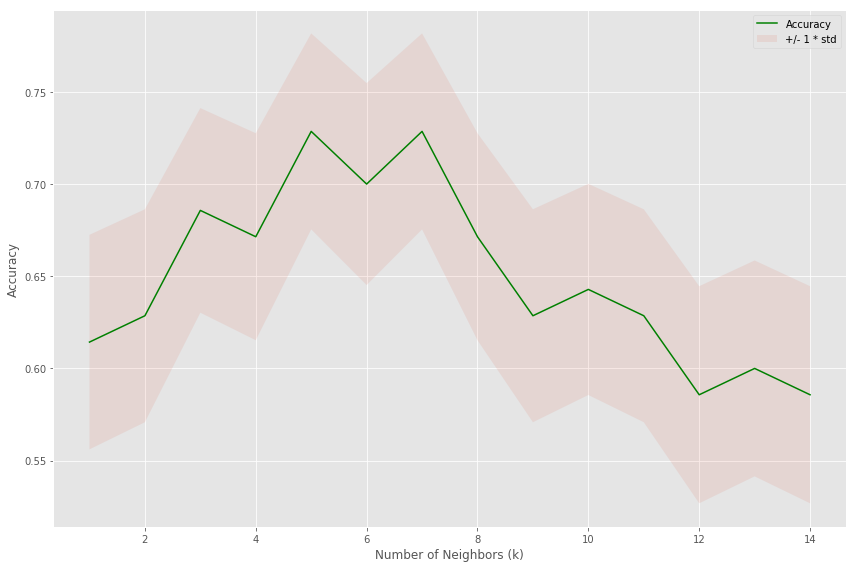

In [85]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(range(1, Ks), mean_acc, 'g')
ax.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
ax.legend(("Accuracy", "+/- 1 * std"))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Neighbors (k)")
plt.tight_layout()

# Decision Tree

In [115]:
Depths = 20
mean_acc = np.zeros((Depths-1))
for n in np.arange(1, Depths):
    loanTree = DecisionTreeClassifier(criterion='entropy', max_depth = n).fit(X_train, y_train)
    predTree = loanTree.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, predTree)
table = pd.DataFrame({
    "Number_Depths":np.arange(1,Depths),
    "Avg_accuracy":mean_acc
})
table

,Number_Depths,Avg_accuracy
0,1,0.714286
1,2,0.571429
2,3,0.585714
3,4,0.614286
4,5,0.600000
5,6,0.585714
6,7,0.600000
7,8,0.585714
8,9,0.614286
9,10,0.642857


In [119]:
loanTree = DecisionTreeClassifier(criterion='entropy', max_depth = 13)
print("The DT tree model is: \n", loanTree)
loanTree.fit(X_train, y_train)
predTree = loanTree.predict(X_test)
print("Actual values (test set): ", y_train[0:10], "...")
print("Predicted values: ", predTree[0:10], "...")
Accuracy_score = accuracy_score(y_test, predTree)
print("Accuracy: ", Accuracy_score)

The DT tree model is: 
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Actual values (test set):  ['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'] ...
Predicted values:  ['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'] ...
Accuracy:  0.7


In [129]:
np.unique(y_train)

array(['COLLECTION', 'PAIDOFF'], dtype=object)

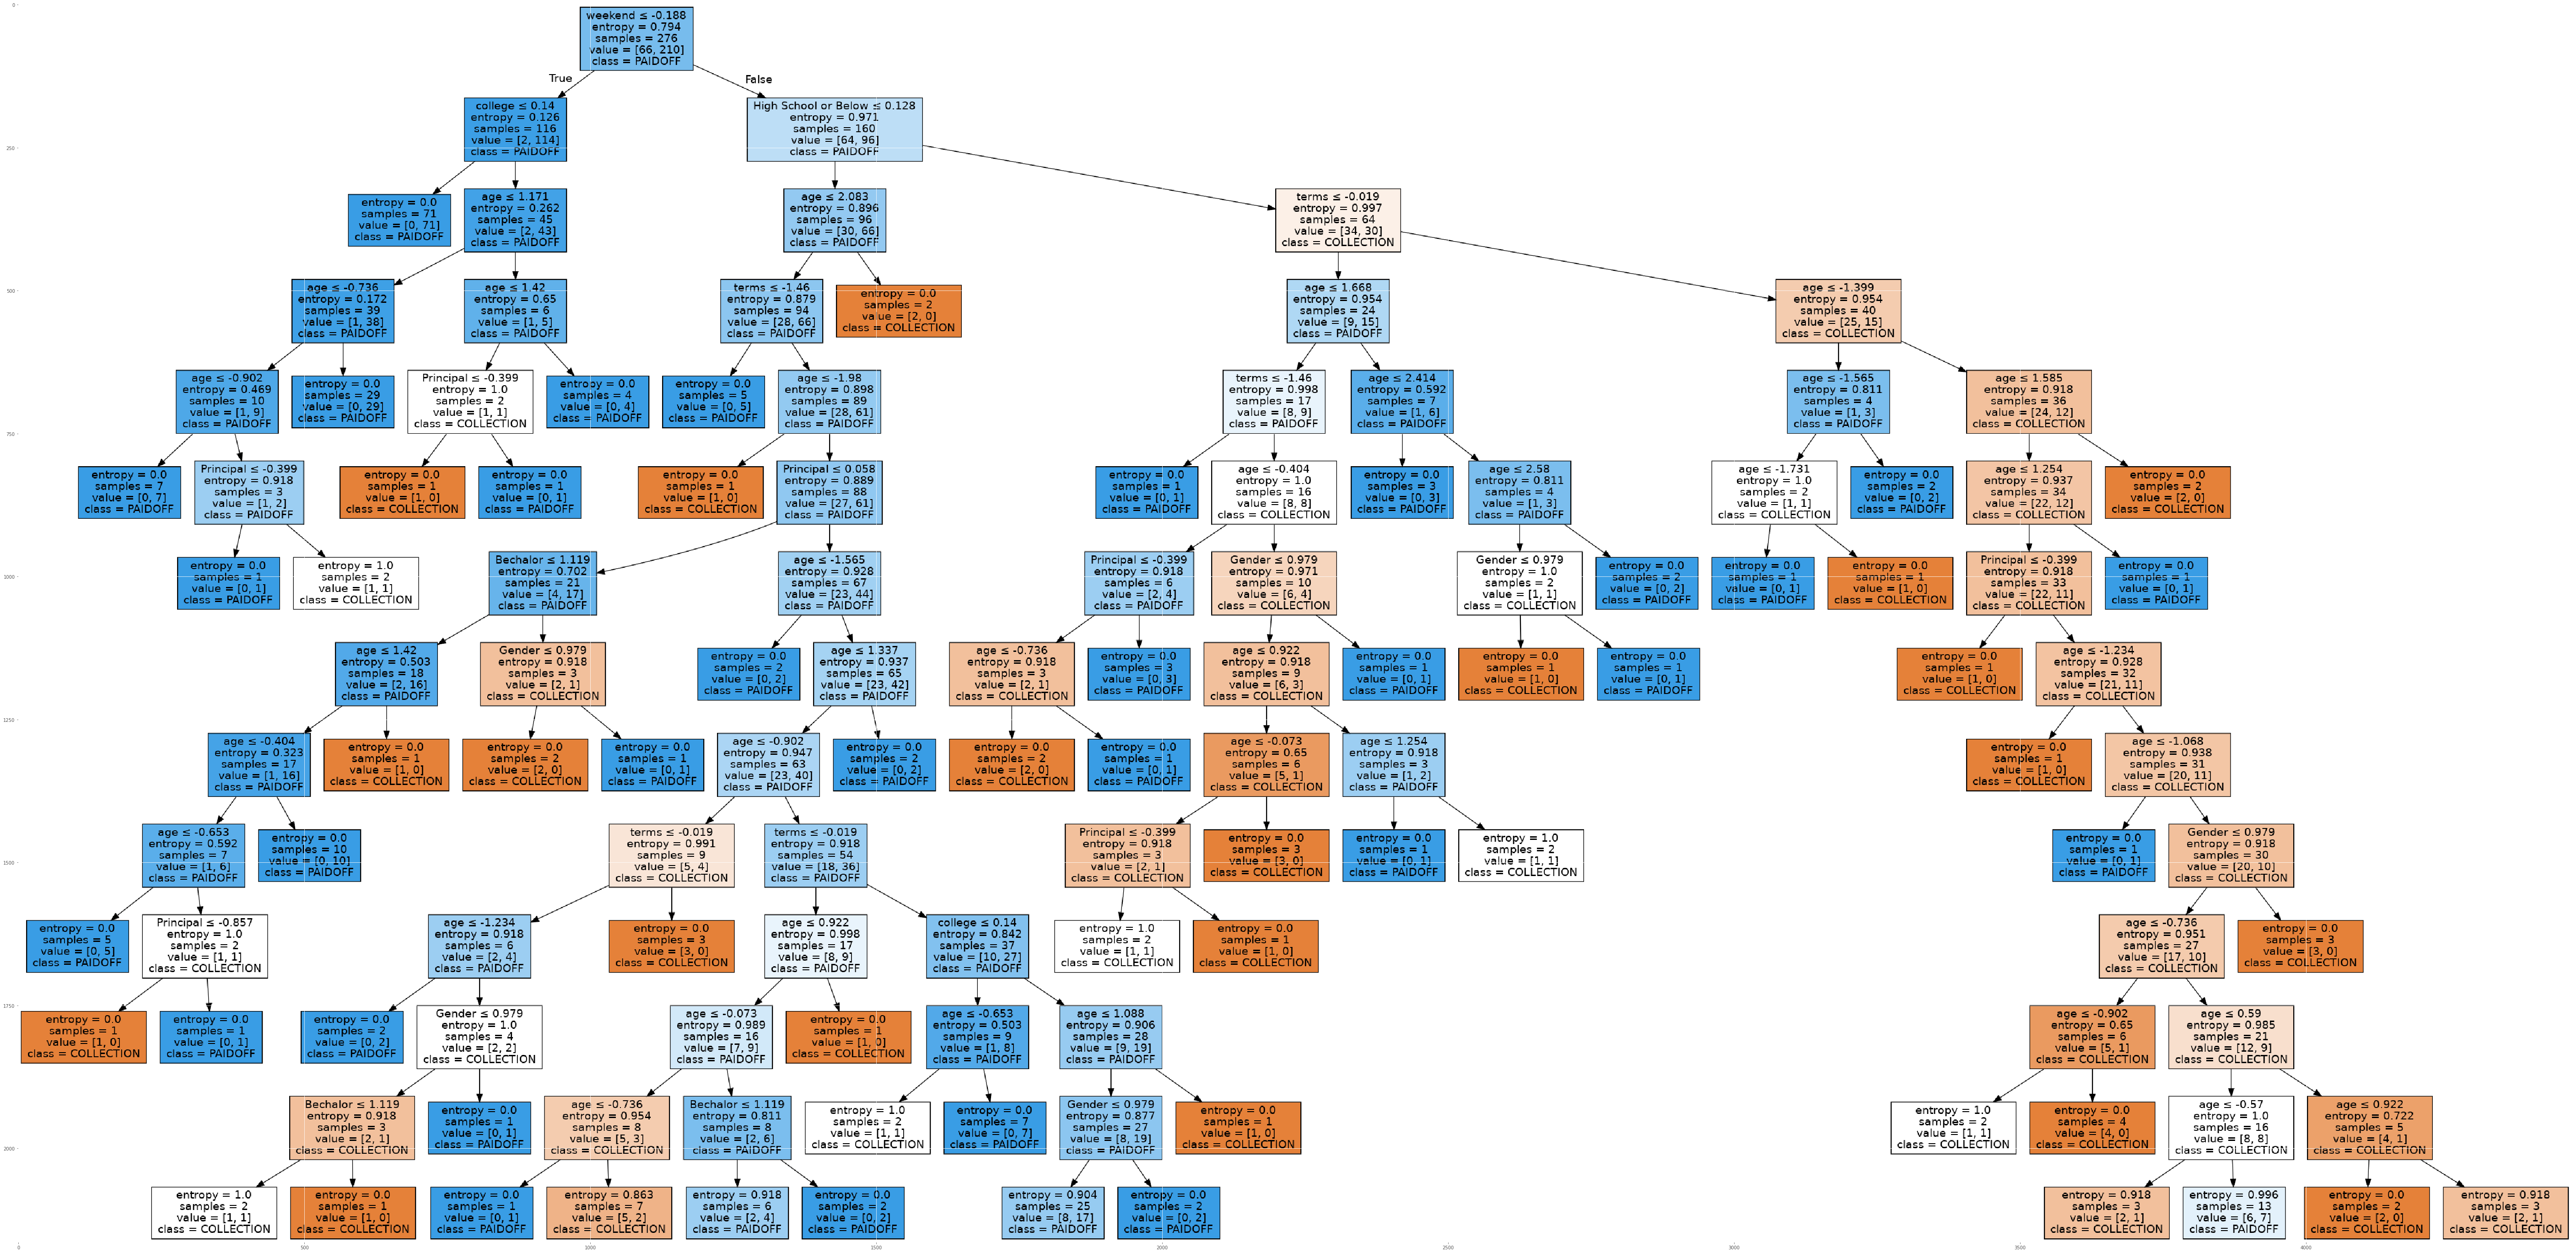

In [134]:
dot_data = StringIO()
filename = 'loantree.png'
featureNames = Feature.columns
# targetNames = df['loan_status'].unique().tolist()

out = export_graphviz(loanTree,
                     feature_names=featureNames,
                     out_file=dot_data,
                     class_names=np.unique(y_train),
                      filled = True,
                      special_characters=True,
                      rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)

plt.figure(figsize = (100, 200))
plt.imshow(img, interpolation='nearest')

plt.show()

# Support Vector Machine

In [200]:
clf = svm.SVC(kernel = 'rbf', gamma = 'scale', random_state=111)
print("The model is: ", clf)
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)
y_test_hat[0:5]

The model is:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [139]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix w.o. normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = ".2f" if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment = 'center',
                color = "white" if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel("True values")
    plt.xlabel("Predicted values")

              precision    recall  f1-score   support

  COLLECTION       0.21      0.15      0.18        20
     PAIDOFF       0.70      0.78      0.74        50

   micro avg       0.60      0.60      0.60        70
   macro avg       0.46      0.47      0.46        70
weighted avg       0.56      0.60      0.58        70

Confusion matrix w.o. normalization
[[39 11]
 [17  3]]


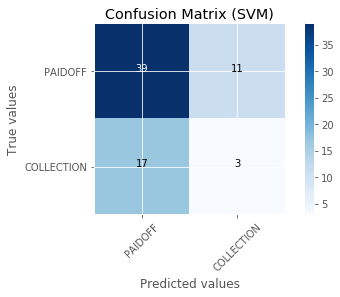

In [201]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_hat, labels = ['PAIDOFF', 'COLLECTION'])

np.set_printoptions(precision=2)

print(classification_report(y_test, y_test_hat))

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes = ['PAIDOFF', 'COLLECTION'],
                      normalize=False,
                      title = 'Confusion Matrix (SVM)')

In [151]:
print("f1 score : ", round(f1_score(y_test, y_test_hat, average='weighted'),4))
print("Jaccard similarity score: ", round(jaccard_similarity_score(y_test, y_test_hat), 4))


f1 score :  0.576
Jaccard similarity score:  0.6


# Logistic Regression

In [204]:
LR = LogisticRegression(C=0.05, solver='liblinear')
print("The model is: ", LR)
LR.fit(X_train, y_train)

y_test_hat = LR.predict(X_test)
print("The actual test values are: ", y_test[0:15], "...")
print("The Predicted test values are: ", y_test_hat[0:15], "...")
y_test_hat_prob = LR.predict_proba(X_test)
print("The predicted probability are:", y_test_hat_prob[0:15], "...")
#print("f1 score : ", round(f1_score(y_test, y_test_hat, average='weighted'),4))
print("Jaccard similarity score: ", round(jaccard_similarity_score(y_test, y_test_hat), 4))
print("log loss: ", log_loss(y_test, y_test_hat_prob))

The model is:  LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
The actual test values are:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF'] ...
The Predicted test values are:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF'] ...
The predicted probability are: [[0.15 0.85]
 [0.42 0.58]
 [0.34 0.66]
 [0.21 0.79]
 [0.43 0.57]
 [0.33 0.67]
 [0.35 0.65]
 [0.11 0.89]
 [0.45 0.55]
 [0.15 0.85]
 [0.47 0.53]
 [0.15 0.85]
 [0.37 0.63]
 [0.14 0.86]
 [0.43 0.57]] ...
Jaccard similarity score:  0.6143
log loss:  0.5532742207257524


Confusion matrix w.o. normalization
[[40 10]
 [17  3]]


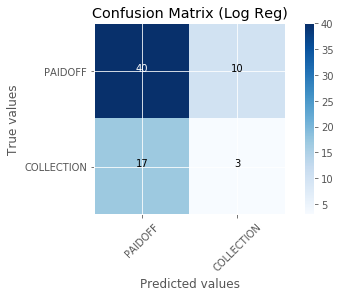

In [198]:
cnf_matrix = confusion_matrix(y_test, y_test_hat, labels = ['PAIDOFF', 'COLLECTION'])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes = ['PAIDOFF', 'COLLECTION'],
                     normalize=False,
                     title="Confusion Matrix (Log Reg)")

# Model Evaluation using Test set

In [194]:
#from sklearn.metrics import jaccard_similarity_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import log_loss

First, download and load the test set:

In [193]:
!wget -O data/loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-07-08 05:22:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-07-08 05:22:53 (618 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [195]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [208]:
KNN_y_test_hat = KNeighborsClassifier(n_neighbors= 4).fit(X_train, y_train).predict(X_test)
KNN_f1_score = f1_score(y_test, KNN_y_test_hat, average='weighted')
KNN_Jaccard = jaccard_similarity_score(y_test, KNN_y_test_hat)

In [207]:
DT_y_test_hat = DecisionTreeClassifier(criterion='entropy', max_depth = 13).fit(X_train, y_train).predict(X_test)
DT_f1_score = f1_score(y_test, DT_y_test_hat, average = 'weighted')
DT_Jaccard = jaccard_similarity_score(y_test, DT_y_test_hat)

In [209]:
SVM_y_test_hat = svm.SVC(kernel = 'rbf', gamma = 'scale', random_state=111).fit(X_train, y_train).predict(X_test)
SVM_f1_score = f1_score(y_test, SVM_y_test_hat, average = 'weighted')
SVM_Jacard = jaccard_similarity_score(y_test, SVM_y_test_hat)

In [210]:
LR_y_test_hat = LogisticRegression(C=0.05, solver='liblinear').fit(X_train, y_train).predict(X_test)
LR_y_test_hat_prob = LogisticRegression(C=0.05, solver='liblinear').fit(X_train, y_train).predict_proba(X_test)
LR_f1_score = f1_score(y_test, LR_y_test_hat, average = 'weighted')
LR_Jacard = jaccard_similarity_score(y_test, LR_y_test_hat)
LR_LogLoss = log_loss(y_test, LR_y_test_hat_prob)

In [214]:
temp_dict = {"Algorithm":["KNN", "Decision Tree", "SVM", "LogisticRegression"]}
temp_table = pd.DataFrame(temp_dict)
temp_table['Jaccard'] = [KNN_Jaccard, DT_Jaccard, SVM_Jacard, LR_Jacard]
temp_table['F1-score'] = [KNN_f1_score, DT_f1_score, SVM_f1_score, LR_f1_score]
temp_table['LogLoss'] = [np.nan, np.nan, np.nan, LR_LogLoss]
temp_table

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.671429,0.683531,NaN
1,Decision Tree,0.700000,0.697639,NaN
2,SVM,0.600000,0.576027,NaN
3,LogisticRegression,0.614286,0.585993,0.553274


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>